In [96]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import subprocess
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

plt.style.use('ggplot')
%matplotlib inline

In [97]:
data=pd.read_csv('ORGANICS.csv',encoding="cp1251")
print(data.shape)
print(data.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [98]:
data = data.fillna(df.median(axis=0), axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [99]:
data.isnull().any().any()

True

In [100]:
data = data.fillna(data.mean())

In [101]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [103]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=50)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
#confusion matrix
y_pred = tree.predict(x_test)

In [105]:
confusion_matrix(y_test, y_pred)

array([[4706,  315],
       [1051,  595]], dtype=int64)

In [106]:
# Mean Consequential Error
print(accuracy_score(y_test, y_pred))

0.7951102444877756


In [107]:
# Recall
print(recall_score(y_test, y_pred))

0.3614823815309842


In [108]:
balanced_accuracy_score(y_test, y_pred)

0.6493729374295032

In [109]:
# Matthews correlation coefficient
matthews_corrcoef(y_test, y_pred)

0.37522618032732435

In [110]:
# precision
print(precision_score(y_test, y_pred))

0.6538461538461539


In [111]:
print(f1_score(y_test, y_pred))

0.4655712050078248


In [112]:
print(cohen_kappa_score(y_test, y_pred))

0.35158160136907224


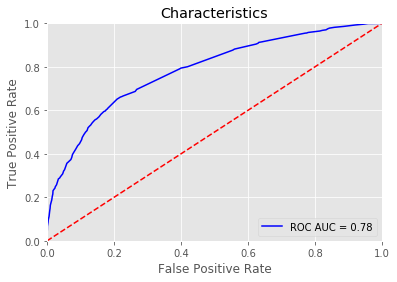

In [119]:
x = tree.predict_proba(x_test)
pred = x[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Characteristics')
plt.plot(fpr, tpr, 'b', label = 'ROC AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()